<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [9]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [10]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [11]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [12]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


## Median value of owner-occupied homes

boston_df.head()

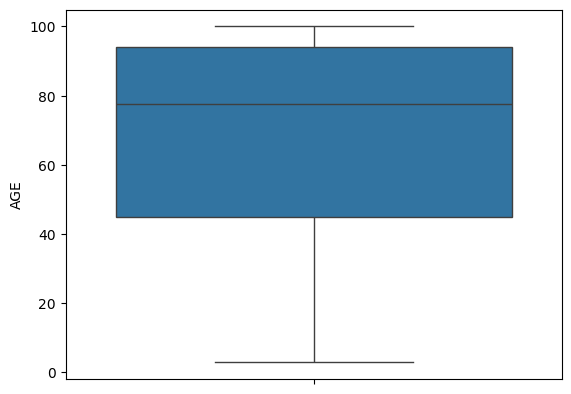

In [17]:
ax = sns.boxplot(y = 'AGE', data = boston_df)
pyplot.show()

## Charles river bar plot

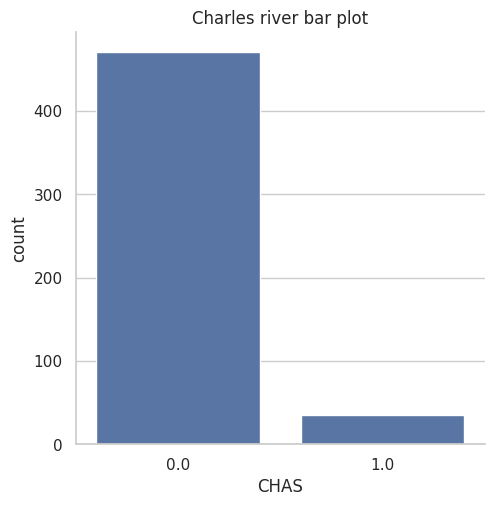

In [24]:
sns.set(style = "whitegrid")
ax = sns.catplot(x ='CHAS', kind = 'count', data = boston_df)
ax.set(title = "Charles river bar plot")
pyplot.show()

##  Boxplot - the MEDV variable vs the AGE variable

In [32]:
boston_df.loc[(boston_df['AGE'] < 35),'age_group'] = 'younger than 35'
boston_df.loc[(boston_df['AGE']>= 35) & (boston_df['AGE'] < 70)  , 'age_group'] = 'between 35 and 70'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 and older'
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70


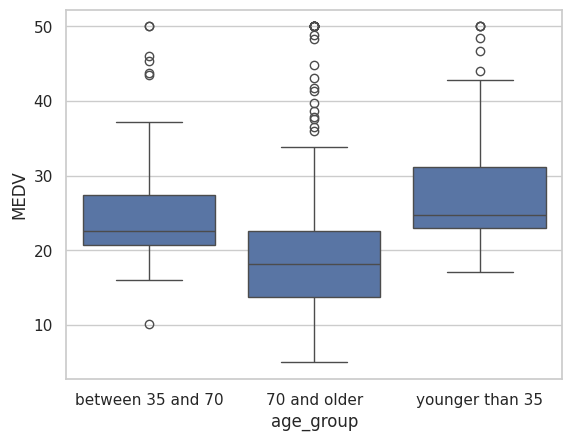

In [33]:
ax = sns.boxplot(x= 'age_group', y = 'MEDV', data = boston_df)
pyplot.show()

##  The relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town

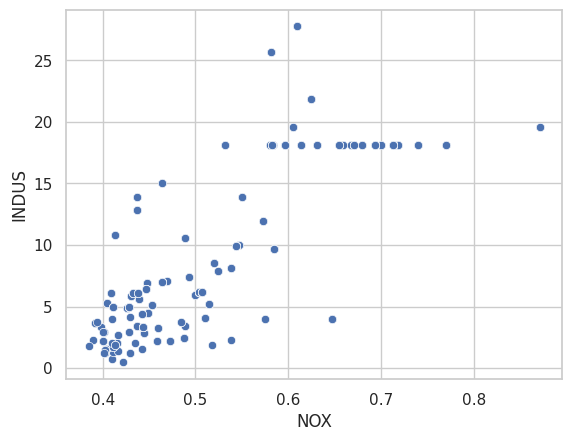

In [34]:
ax = sns.scatterplot(x= 'NOX', y = 'INDUS', data = boston_df)
pyplot.show()

In [36]:
# We can say that there is a positive relationship between the Nitric Oxides Concentration and the proportion of non-retail business acres

## Pupil to teacher ratio

<ipython-input-37-1e93e170ea2b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(boston_df['PTRATIO'], kde = False)


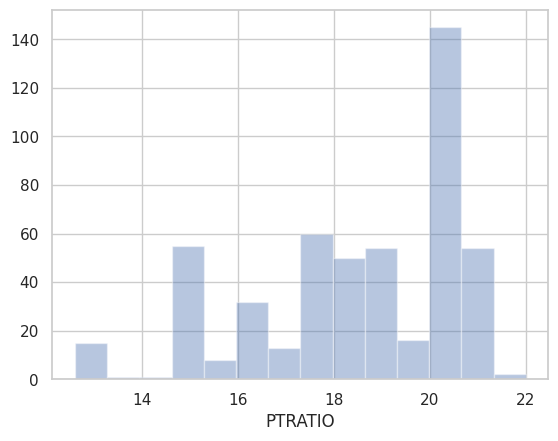

In [37]:
ax = sns.distplot(boston_df['PTRATIO'], kde = False)
pyplot.show()

### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

H0 - There is not a significant difference between the median value of houses bounded by the Charles river and those who are not


H1 - There is a significant difference in the median value of the houses bounded by the Charles river and those who are not

In [39]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1.0]['MEDV'],
                   center = 'mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

P-value is less than 0.05 so we cannot assume the equality of variances

In [40]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0.0]['MEDV'],
                      boston_df[boston_df['CHAS'] == 1.0]['MEDV'],
                      equal_var = False)

TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

P-value is less than 0.05 so we reject the h0 - that means that there is a significant difference in the median value of the houses bounded by the Charles river and those who are not

### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

H0 - the means of the median values of houses of different age groups are not statistically different

H1 - there is a difference between the median values of houses of different age groups

In [42]:
lower_35 = boston_df[boston_df['age_group'] == 'younger than 35']['MEDV']
between_35_and_70 = boston_df[boston_df['age_group'] == 'between 35 and 70']['MEDV']
upper_70 = boston_df[boston_df['age_group'] == '70 and older']['MEDV']

In [45]:
f_statistics , p_value = scipy.stats.f_oneway(lower_35, between_35_and_70, upper_70)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistics,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


We can assume that there is a difference between the median values of houses of different age groups because the p-value is less than 0.05

### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

H0 - there is no relationship between Nitric oxide concentrations and proportion of non - retail business acres

H1 - there is a significant relationship between Nitric oxide concentrations and proportion of non - retail business acres

In [46]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

We can conclude that there is a significant relationship between Nitric oxide concentrations and proportion of non - retail business acres, which is around 0.76, which means there is a strong positive relatioship between the two variables



### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

H0 - the additional weighted distance to the five Boston employment centers does not have an impact on the median value of owner occupied homes

H1 - the additional weighted distance to the five Boston employment centers does have an impact on the median value of owner occupied homes

In [48]:
X = boston_df['DIS']

y = boston_df['MEDV']

X = sm.add_constant(X)

model = sm.OLS(y,X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 06 Aug 2024   Prob (F-statistic):           1.21e-08
Time:                        11:53:20   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

P-value is less than 0.05 so we can assume that there is an impact. The correlation coefficient is around 0.2 which shows the weak positive correleation.